In [69]:
## Import packages

import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

! pip install openpyxl 

print("Finish")

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
Finish


## 1. Transaction data 

In [70]:
## Read transcationData file
transactionData = pd.read_excel('QVI_transaction_data.xlsx')

In [71]:
## Display the first ten rows of transactionData
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [72]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [73]:
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


**Change DATE variable into correct data type.**

In [74]:
transactionData["DATE"] = pd.to_datetime(transactionData["DATE"], origin="1899-12-30",unit="D")
transactionData['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

**Examine PROD_NAME**

In [75]:
transactionData["PROD_NAME"].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

Eliminate digits and special characters from PROD_NAME

In [76]:
import re
PROD_name = transactionData["PROD_NAME"].str.replace('([0-9]+[gG])','').str.replace('[^\w]', ' ').str.split()

# Calculate the frequency grouped by words and sort them
PROD_types = pd.value_counts([word for name in PROD_name for word in name]).sort_values(ascending=False)  
PROD_types.head()

<ipython-input-76-62795c6893b7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  PROD_name = transactionData["PROD_NAME"].str.replace('([0-9]+[gG])','').str.replace('[^\w]', ' ').str.split()


Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
dtype: int64

Remove salsa

In [77]:
transactionData = transactionData[-transactionData["PROD_NAME"].str.contains("[Ss]alsa")]

In [78]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [79]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [80]:
transactionData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

**Outliers**

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


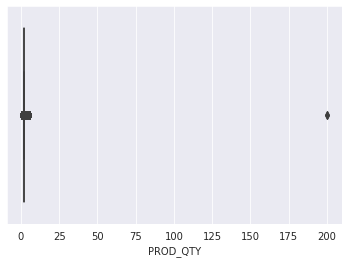

In [81]:
sns.boxplot(transactionData.PROD_QTY)

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


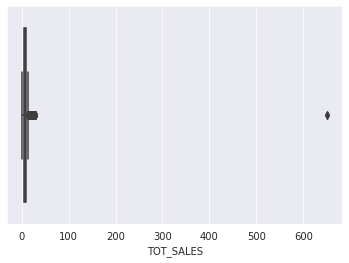

In [82]:
sns.boxplot(transactionData.TOT_SALES)

In [83]:
# Find the outlier
transactionData.loc[transactionData["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [84]:
# See what other transactions that customer made
transactionData.loc[transactionData["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [85]:
# Filter out the customer based on the loyalty card number
transactionData = transactionData.drop(index=[69762,69763])

# Re-examine transaction data
transactionData.loc[transactionData["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [86]:
# Count the number of transactions by date
trans_date = transactionData.groupby(["DATE"]).count()
trans_date.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660


In [87]:
# Create a summary of transaction count by date
trans_date.describe()
# However, we find there are only 364 rows, which indicates we have one missing date. 

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143
std,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536
min,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
25%,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
50%,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
75%,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000
max,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000


In [88]:
transaction_dates = pd.date_range("2018-07-01","2019-06-30")

all_dates = trans_date.reindex(transaction_dates)
all_dates
# usage of reindex: Conform Series/DataFrame to new index with optional filling logic.

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-07-01,663.0,663.0,663.0,663.0,663.0,663.0,663.0
2018-07-02,650.0,650.0,650.0,650.0,650.0,650.0,650.0
2018-07-03,674.0,674.0,674.0,674.0,674.0,674.0,674.0
2018-07-04,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2018-07-05,660.0,660.0,660.0,660.0,660.0,660.0,660.0
...,...,...,...,...,...,...,...
2019-06-26,657.0,657.0,657.0,657.0,657.0,657.0,657.0
2019-06-27,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2019-06-28,673.0,673.0,673.0,673.0,673.0,673.0,673.0
2019-06-29,703.0,703.0,703.0,703.0,703.0,703.0,703.0


In [89]:
# Find out the missing day
all_dates.index.difference(transactionData["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [90]:
# 2018-12-25 is the missing day
all_dates.loc['2018-12-25',:]

STORE_NBR        NaN
LYLTY_CARD_NBR   NaN
TXN_ID           NaN
PROD_NBR         NaN
PROD_NAME        NaN
PROD_QTY         NaN
TOT_SALES        NaN
Name: 2018-12-25 00:00:00, dtype: float64

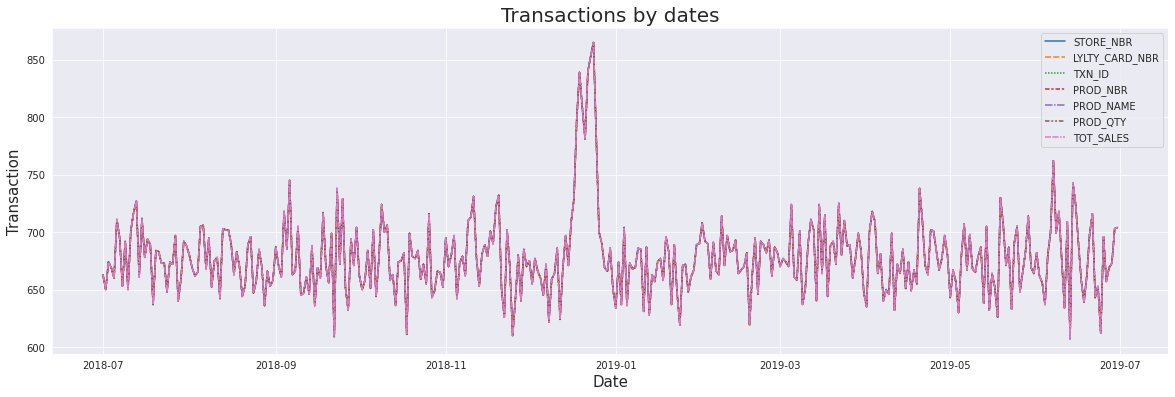

In [91]:
# Plot transactions over time
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.title("Transactions by dates",fontsize = 20)
sns.lineplot(data = all_dates)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

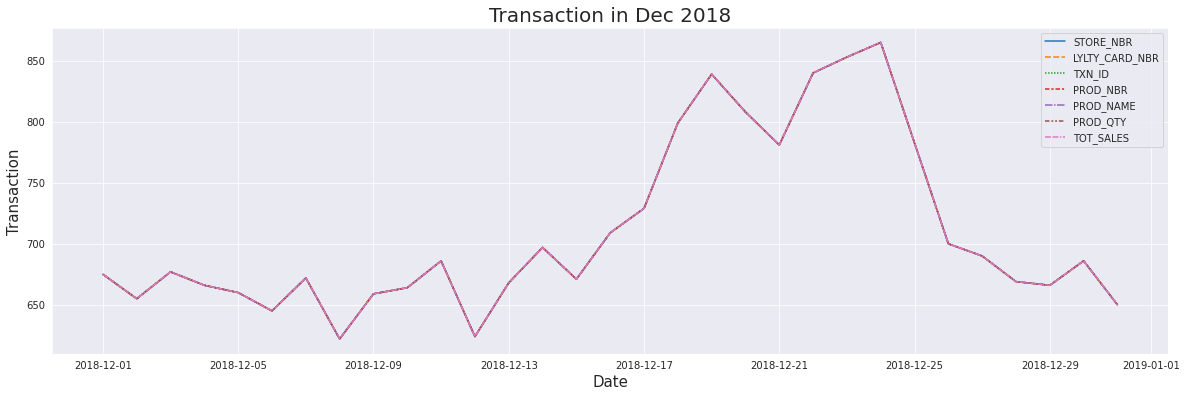

In [92]:
# Zoom in to December and look at individual days
plt.figure(figsize=(20,6))
plt.title("Transaction in Dec 2018",fontsize=20)
sns.lineplot(data=all_dates.loc['2018-12-01':'2018-12-31',:])
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

# Other feature

Get a new variable named PACK_SIZE from digits in PROD_NAME

In [93]:
transactionData["PACK_SIZE"] = transactionData["PROD_NAME"].str.extract("([0-9]+)").astype("float")
transactionData["PACK_SIZE"].head()

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: PACK_SIZE, dtype: float64

In [94]:
transactionData["PACK_SIZE"].describe()

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

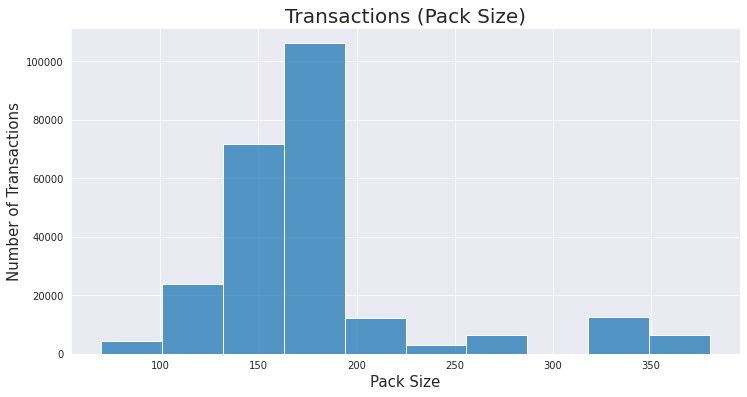

In [95]:
# Plot a histogram showing the number of transactions by pack size
plt.figure(figsize=(12,6))
sns.histplot(x = transactionData["PACK_SIZE"], bins=10, kde=False)
plt.title("Transactions (Pack Size)",fontsize=20)
plt.xlabel("Pack Size",fontsize=15)
plt.ylabel("Number of Transactions",fontsize=15)

Create a new variable named BRAND

In [96]:
transactionData["BRAND"] = transactionData["PROD_NAME"].str.split().str[0]
transactionData["BRAND"].head()

0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: BRAND, dtype: object

In [97]:
# Check their names
brand_name = transactionData["BRAND"].unique()
brand_name.sort()
brand_name

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

In [98]:
transactionData["PROD_NAME"].loc[transactionData["BRAND"]=="Red"].head()

28        Red Rock Deli Thai  Chilli&Lime 150g
34     Red Rock Deli Sp    Salt & Truffle 150G
212    Red Rock Deli Sp    Salt & Truffle 150G
297       Red Rock Deli Thai  Chilli&Lime 150g
331    Red Rock Deli Sp    Salt & Truffle 150G
Name: PROD_NAME, dtype: object

In [99]:
transactionData["PROD_NAME"].loc[transactionData["BRAND"]=="Grain"].head()

7      Grain Waves         Sweet Chilli 210g
9      Grain Waves Sour    Cream&Chives 210G
85     Grain Waves         Sweet Chilli 210g
181    Grain Waves         Sweet Chilli 210g
225    Grain Waves         Sweet Chilli 210g
Name: PROD_NAME, dtype: object

In [100]:
transactionData["PROD_NAME"].loc[transactionData["BRAND"] == "Natural"].head()

0       Natural Chip        Compny SeaSalt175g
40      Natural ChipCo      Hony Soy Chckn175g
75     Natural Chip Co     Tmato Hrb&Spce 175g
214    Natural Chip Co     Tmato Hrb&Spce 175g
234     Natural ChipCo      Hony Soy Chckn175g
Name: PROD_NAME, dtype: object

Some names are similar. We can make them to one name.

In [101]:
def rename_brand(new,old):
    transactionData["BRAND"].loc[transactionData["BRAND"]==old] = new

rename_brand("Red Rock Deli","Red")
rename_brand("Red Rock Deli","RRD")

rename_brand("Doritos","Dorito")

rename_brand("Grain Waves","Grain")
rename_brand("Grain Waves","GrnWves")

rename_brand("Infuzions","Infzns")

rename_brand("Smiths","Smith")

rename_brand("Sunbites","Snbts")

rename_brand("Woolworths","WW")

rename_brand("Natural Chip Co","NCC")
rename_brand("Natural Chip Co","Natural")

# Check results
unique_brand_name = transactionData["BRAND"].unique()
unique_brand_name.sort()
unique_brand_name

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain Waves', 'Infuzions', 'Kettle', 'Natural Chip Co',
       'Pringles', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths'], dtype=object)

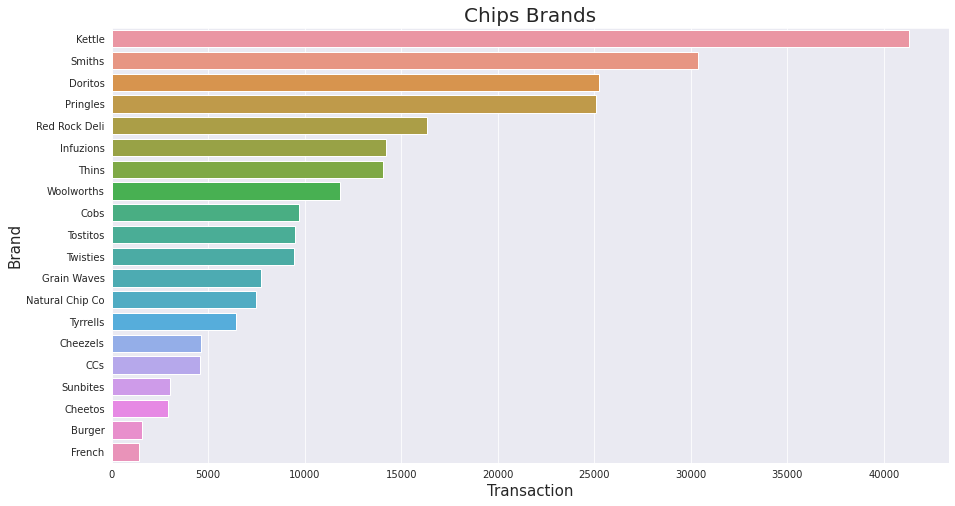

In [102]:
plt.figure(figsize=(15,8))
sns.barplot(x = transactionData["BRAND"].value_counts(), y=transactionData["BRAND"].value_counts().index)
plt.title("Chips Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)

In [103]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


# 2. Customer Data

In [104]:
# Read data
customerData = pd.read_csv('QVI_purchase_behaviour.csv')
customerData.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [105]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [106]:
customerData.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


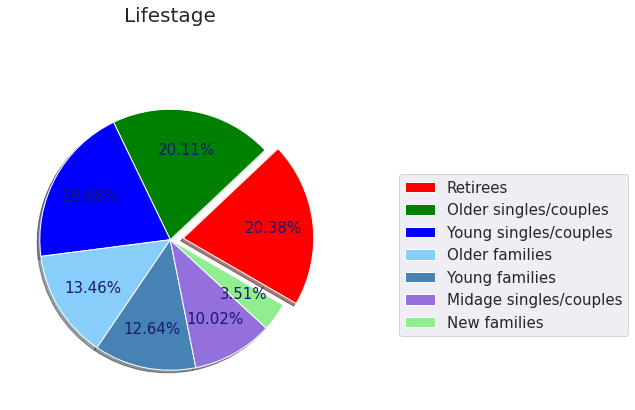

In [107]:
# Plot a pie chart of LIFESTAGE
plt.figure(figsize=(6,6))
colors = ['red', 'green', 'blue', 'lightskyblue','steelblue','mediumpurple', 'lightgreen']
plt.pie(customerData["LIFESTAGE"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0,0,0,0,0), textprops= {'fontsize':15,'color':'midnightblue'}, radius=1, autopct='%.2f%%', pctdistance=0.7, startangle=-30)
plt.legend(customerData["LIFESTAGE"].value_counts().index.str.capitalize(), fontsize=15, loc=2, bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Lifestage", y=1.15, fontsize=20)

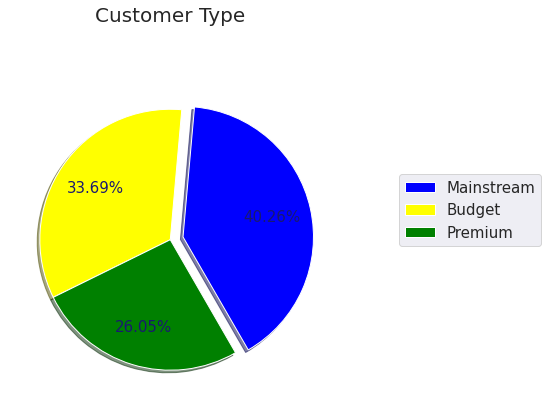

In [108]:
# Plot a pie chart of PREMIUM_CUSTOMER
plt.figure(figsize=(6,6))
colors = ['blue', 'yellow', 'green']
plt.pie(customerData["PREMIUM_CUSTOMER"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0), textprops= {'fontsize':15,'color':'midnightblue'}, radius=1, autopct='%.2f%%', pctdistance=0.7, startangle=-60)
plt.legend(customerData["PREMIUM_CUSTOMER"].value_counts().index, fontsize=15, loc=2, bbox_to_anchor=(1.2,0.7),borderaxespad = 0)
plt.title("Customer Type", y=1.15, fontsize=20)

# Merge Data

In [109]:
# Merge transaction data and customer data
mergeData = pd.merge(transactionData,customerData,on="LYLTY_CARD_NBR")
mergeData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [110]:
mergeData.count()

DATE                246740
STORE_NBR           246740
LYLTY_CARD_NBR      246740
TXN_ID              246740
PROD_NBR            246740
PROD_NAME           246740
PROD_QTY            246740
TOT_SALES           246740
PACK_SIZE           246740
BRAND               246740
LIFESTAGE           246740
PREMIUM_CUSTOMER    246740
dtype: int64

In [111]:
# Check if some customers were not matched on by checking for nulls
mergeData.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [112]:
# save as csv
mergeData.to_csv("merge_data.csv")

In [113]:
totalsales = pd.DataFrame(mergeData.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].sum())
totalsales

TOT_SALES 
 
 
 LIFESTAGE 
 PREMIUM_CUSTOMER 
 
 
 
 
 
 MIDAGE SINGLES/COUPLES 
 Budget 
 33345.70 
 
 
 Mainstream 
 84734.25 
 
 
 Premium 
 54443.85 
 
 
 NEW FAMILIES 
 Budget 
 20607.45 
 
 
 Mainstream 
 15979.70 
 
 
 Premium 
 10760.80 
 
 
 OLDER FAMILIES 
 Budget 
 156863.75 
 
 
 Mainstream 
 96413.55 
 
 
 Premium 
 75242.60 
 
 
 OLDER SINGLES/COUPLES 
 Budget 
 127833.60 
 
 
 Mainstream 
 124648.50 
 
 
 Premium 
 123537.55 
 
 
 RETIREES 
 Budget 
 105916.30 
 
 
 Mainstream 
 145168.95 
 
 
 Premium 
 91296.65 
 
 
 YOUNG FAMILIES 
 Budget 
 129717.95 
 
 
 Mainstream 
 86338.25 
 
 
 Premium 
 78571.70 
 
 
 YOUNG SINGLES/COUPLES 
 Budget 
 57122.10 
 
 
 Mainstream 
 147582.20 
 
 
 Premium 
 39052.30

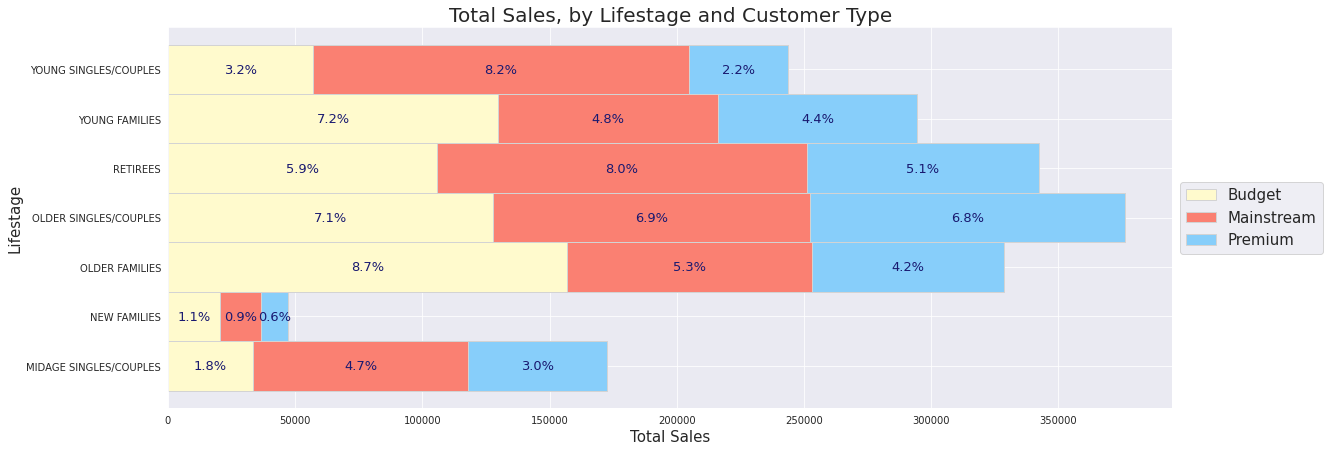

In [114]:
# https://github.com/ShrishtiHore/Quantium_Virtual_Experience_Program/blob/main/Task%201.ipynb

bars1 = totalsales[totalsales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["TOT_SALES"]
bars2 = totalsales[totalsales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["TOT_SALES"]
bars3 = totalsales[totalsales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["TOT_SALES"]
 
bars1_text = (bars1 / sum(totalsales["TOT_SALES"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(totalsales["TOT_SALES"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(totalsales["TOT_SALES"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = totalsales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Total Sales",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

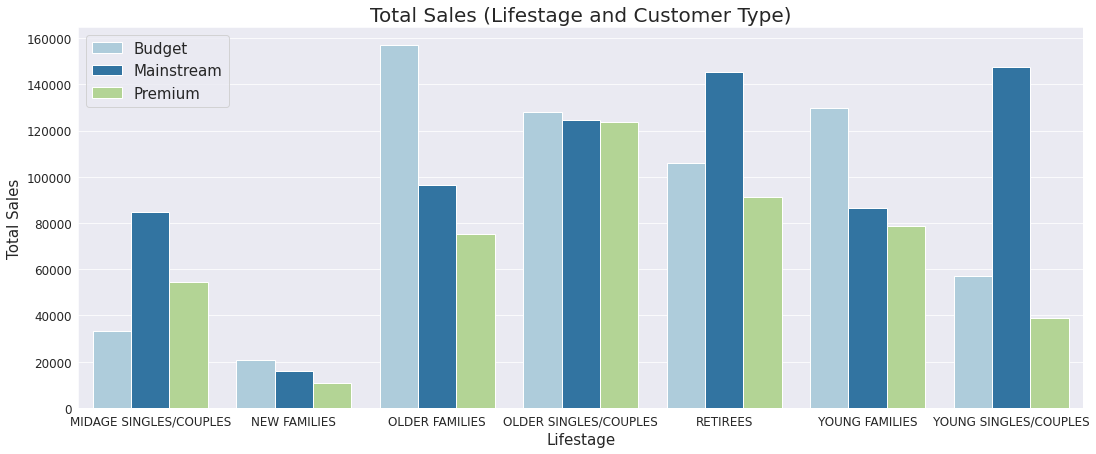

In [115]:
# total sales in different lifestages and customers
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
ax=sns.barplot(x=totalsales.reset_index()["LIFESTAGE"], y=totalsales.reset_index()["TOT_SALES"], 
            hue=totalsales.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("Paired", 3))
plt.title("Total Sales (Lifestage and Customer Type)",fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Total Sales",fontsize=15)

We can know that,for three different types of customer type: Budget -- Older families, Premium -- Older singles/couples, Mainstream -- Young singles/couples & retirees

In [116]:
#  Calculate the customer count in each segment
count_lifestage_premium = pd.DataFrame(customerData.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).count())
count_lifestage_premium.columns=["CUSTOMER_COUNTS"]
count_lifestage_premium

CUSTOMER_COUNTS 
 
 
 LIFESTAGE 
 PREMIUM_CUSTOMER 
 
 
 
 
 
 MIDAGE SINGLES/COUPLES 
 Budget 
 1504 
 
 
 Mainstream 
 3340 
 
 
 Premium 
 2431 
 
 
 NEW FAMILIES 
 Budget 
 1112 
 
 
 Mainstream 
 849 
 
 
 Premium 
 588 
 
 
 OLDER FAMILIES 
 Budget 
 4675 
 
 
 Mainstream 
 2831 
 
 
 Premium 
 2274 
 
 
 OLDER SINGLES/COUPLES 
 Budget 
 4929 
 
 
 Mainstream 
 4930 
 
 
 Premium 
 4750 
 
 
 RETIREES 
 Budget 
 4454 
 
 
 Mainstream 
 6479 
 
 
 Premium 
 3872 
 
 
 YOUNG FAMILIES 
 Budget 
 4017 
 
 
 Mainstream 
 2728 
 
 
 Premium 
 2433 
 
 
 YOUNG SINGLES/COUPLES 
 Budget 
 3779 
 
 
 Mainstream 
 8088 
 
 
 Premium 
 2574

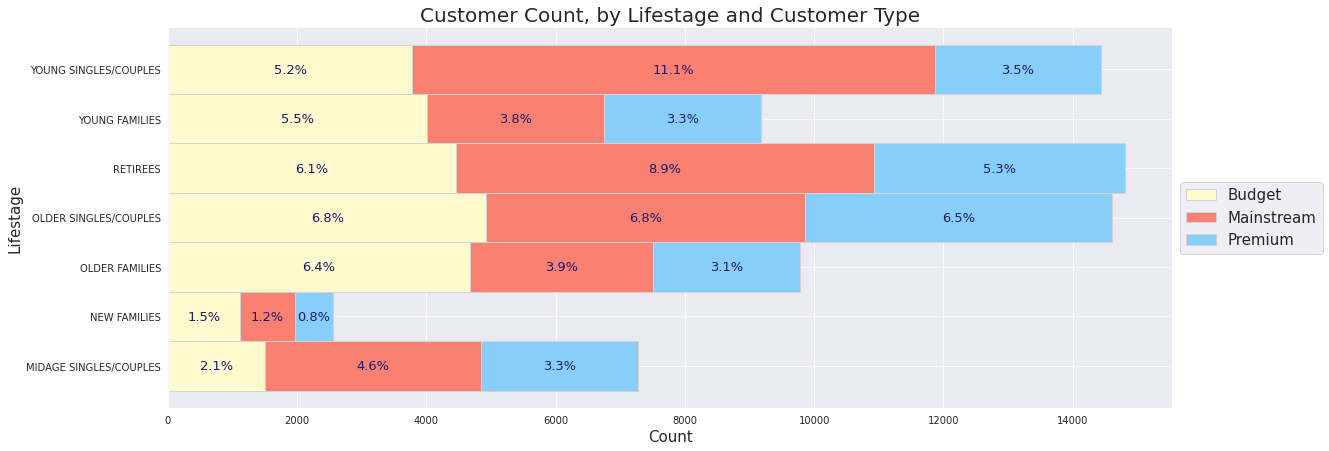

In [117]:
# https://github.com/victoriafy/Quantium-virtual-internship/blob/main/Quantium%20Virtual%20Internship%20Task%201.ipynb

bars1 = count_lifestage_premium[count_lifestage_premium.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["CUSTOMER_COUNTS"]
bars2 = count_lifestage_premium[count_lifestage_premium.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["CUSTOMER_COUNTS"]
bars3 = count_lifestage_premium[count_lifestage_premium.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["CUSTOMER_COUNTS"]
 
bars1_text = (bars1 / sum(count_lifestage_premium["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(count_lifestage_premium["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(count_lifestage_premium["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = count_lifestage_premium.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

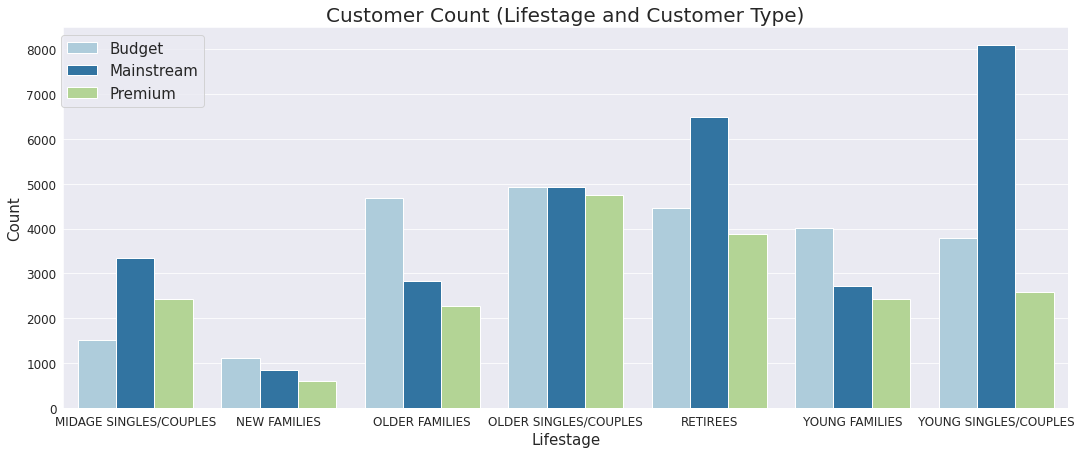

In [118]:
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=count_lifestage_premium.reset_index()["LIFESTAGE"], y=count_lifestage_premium.reset_index()["CUSTOMER_COUNTS"], 
            hue=count_lifestage_premium.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("Paired", 3))
plt.title("Customer Count (Lifestage and Customer Type)",fontsize=20)
plt.legend(loc=0, fontsize=15, bbox_to_anchor=(0.14,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Count",fontsize=15)

In [119]:
merge_lifestage_premium = pd.merge(totalsales,count_lifestage_premium,on=["LIFESTAGE","PREMIUM_CUSTOMER"])
merge_lifestage_premium['SALES_QTY'] = mergeData.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
merge_lifestage_premium['AVG_SALES_QTY'] = (merge_lifestage_premium["SALES_QTY"]/merge_lifestage_premium["CUSTOMER_COUNTS"])
merge_lifestage_premium

TOT_SALES 
 CUSTOMER_COUNTS 
 SALES_QTY 
 AVG_SALES_QTY 
 
 
 LIFESTAGE 
 PREMIUM_CUSTOMER 
 
 
 
 
 
 
 
 
 MIDAGE SINGLES/COUPLES 
 Budget 
 33345.70 
 1504 
 8883 
 5.906250 
 
 
 Mainstream 
 84734.25 
 3340 
 21213 
 6.351198 
 
 
 Premium 
 54443.85 
 2431 
 14400 
 5.923488 
 
 
 NEW FAMILIES 
 Budget 
 20607.45 
 1112 
 5241 
 4.713129 
 
 
 Mainstream 
 15979.70 
 849 
 4060 
 4.782097 
 
 
 Premium 
 10760.80 
 588 
 2769 
 4.709184 
 
 
 OLDER FAMILIES 
 Budget 
 156863.75 
 4675 
 41853 
 8.952513 
 
 
 Mainstream 
 96413.55 
 2831 
 25804 
 9.114800 
 
 
 Premium 
 75242.60 
 2274 
 20239 
 8.900176 
 
 
 OLDER SINGLES/COUPLES 
 Budget 
 127833.60 
 4929 
 32883 
 6.671333 
 
 
 Mainstream 
 124648.50 
 4930 
 32607 
 6.613996 
 
 
 Premium 
 123537.55 
 4750 
 31695 
 6.672632 
 
 
 RETIREES 
 Budget 
 105916.30 
 4454 
 26932 
 6.046700 
 
 
 Mainstream 
 145168.95 
 6479 
 37677 
 5.815249 
 
 
 Premium 
 91296.65 
 3872 
 23266 
 6.008781 
 
 
 YOUNG FAMILIES 
 Budget 
 129717.95 
 4017 
 34482 
 8.584018 
 
 
 Mainstream 
 86338.25 
 2728 
 23194 
 8.502199 
 
 
 Premium 
 78571.70 
 2433 
 20901 
 8.590629 
 
 
 YOUNG SINGLES/COUPLES 
 Budget 
 57122.10 
 3779 
 15500 
 4.101614 
 
 
 Mainstream 
 147582.20 
 8088 
 36225 
 4.478858 
 
 
 Premium 
 39052.30 
 2574 
 10575 
 4.108392

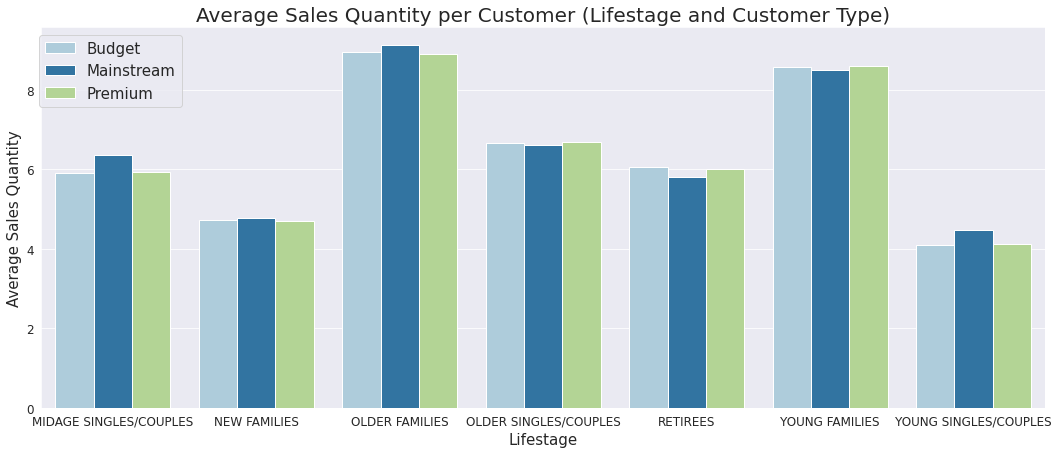

In [120]:
# average number in different lifestages and customers
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_lifestage_premium.reset_index()["LIFESTAGE"], y=merge_lifestage_premium.reset_index()["AVG_SALES_QTY"], hue=merge_lifestage_premium.reset_index()["PREMIUM_CUSTOMER"], palette=sns.color_palette("Paired", 3))
plt.title("Average Sales Quantity per Customer (Lifestage and Customer Type)",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(0.14,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Quantity",fontsize=15)

In [121]:
# average price p
merge_lifestage_premium['AVG_SALES_PRICE'] = (merge_lifestage_premium["TOT_SALES"]/merge_lifestage_premium["SALES_QTY"])
merge_lifestage_premium

TOT_SALES 
 CUSTOMER_COUNTS 
 SALES_QTY 
 AVG_SALES_QTY 
 AVG_SALES_PRICE 
 
 
 LIFESTAGE 
 PREMIUM_CUSTOMER 
 
 
 
 
 
 
 
 
 
 MIDAGE SINGLES/COUPLES 
 Budget 
 33345.70 
 1504 
 8883 
 5.906250 
 3.753878 
 
 
 Mainstream 
 84734.25 
 3340 
 21213 
 6.351198 
 3.994449 
 
 
 Premium 
 54443.85 
 2431 
 14400 
 5.923488 
 3.780823 
 
 
 NEW FAMILIES 
 Budget 
 20607.45 
 1112 
 5241 
 4.713129 
 3.931969 
 
 
 Mainstream 
 15979.70 
 849 
 4060 
 4.782097 
 3.935887 
 
 
 Premium 
 10760.80 
 588 
 2769 
 4.709184 
 3.886168 
 
 
 OLDER FAMILIES 
 Budget 
 156863.75 
 4675 
 41853 
 8.952513 
 3.747969 
 
 
 Mainstream 
 96413.55 
 2831 
 25804 
 9.114800 
 3.736380 
 
 
 Premium 
 75242.60 
 2274 
 20239 
 8.900176 
 3.717703 
 
 
 OLDER SINGLES/COUPLES 
 Budget 
 127833.60 
 4929 
 32883 
 6.671333 
 3.887529 
 
 
 Mainstream 
 124648.50 
 4930 
 32607 
 6.613996 
 3.822753 
 
 
 Premium 
 123537.55 
 4750 
 31695 
 6.672632 
 3.897698 
 
 
 RETIREES 
 Budget 
 105916.30 
 4454 
 26932 
 6.046700 
 3.932731 
 
 
 Mainstream 
 145168.95 
 6479 
 37677 
 5.815249 
 3.852986 
 
 
 Premium 
 91296.65 
 3872 
 23266 
 6.008781 
 3.924037 
 
 
 YOUNG FAMILIES 
 Budget 
 129717.95 
 4017 
 34482 
 8.584018 
 3.761903 
 
 
 Mainstream 
 86338.25 
 2728 
 23194 
 8.502199 
 3.722439 
 
 
 Premium 
 78571.70 
 2433 
 20901 
 8.590629 
 3.759232 
 
 
 YOUNG SINGLES/COUPLES 
 Budget 
 57122.10 
 3779 
 15500 
 4.101614 
 3.685297 
 
 
 Mainstream 
 147582.20 
 8088 
 36225 
 4.478858 
 4.074043 
 
 
 Premium 
 39052.30 
 2574 
 10575 
 4.108392 
 3.692889

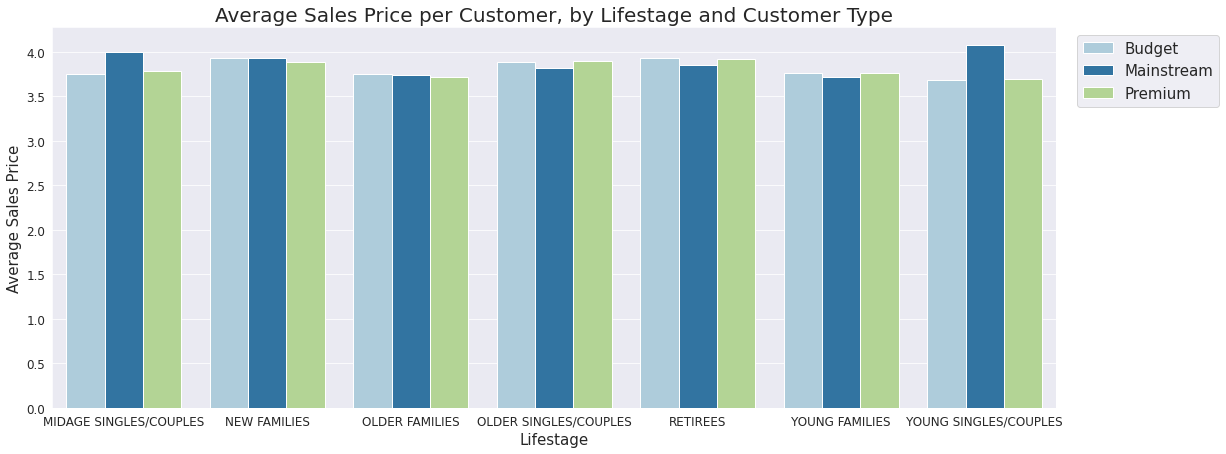

In [122]:
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_lifestage_premium.reset_index()["LIFESTAGE"], y=merge_lifestage_premium.reset_index()["AVG_SALES_PRICE"], 
            hue=merge_lifestage_premium.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("Paired", 3))
plt.title("Average Sales Price per Customer, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.02,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Price",fontsize=15)

Top Package Size: 175g <p>
Top Chips Brand: 
    1. Kettle
    2. Smiths
    3. Doritos
    4. Pringles
    5. Red Rock Deli <p>
Life Stage Sequence:
    1. Retirees (20.38%)
    2. Older singles/couples (20.11%)
    3. Young singles/couples (19.88%)
    4. Older families (13.46%)
    5. Young families (12.64%)
    6. Midage singles/couples (10.02%)
    7. New families (3.51%) <p>
Customer Types: Budget, Mainstremas, Premium <p>
We can know that,for three different types of customer type: Budget -- Older families, Premium -- Older singles/couples, Mainstream -- Young singles/couples & retirees. <p>
Older families and young families buy more chips per customer. (from the plot "Average Sales Quantity per Customer (Lifestage and Customer Type)") <p>
Average Price: in mainstream, midage singles/couples and young singles/couples are willing to spend more money in buying chips.